### SDSE Homework 2 — Raj Thimmareddy

In [66]:
# Dependencies

import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [67]:
# Define the objective function

x1, x2 = sy.symbols('x1 x2')
obj_eq = (x1**3 / 3) - (4*x1) + (x2**3 / 3) - (16*x2)

In [68]:
# Obtain gradient of objective function

df_x1 = sy.diff(obj_eq, x1)
df_x2 = sy.diff(obj_eq, x2)

In [69]:
# Identify stationary points

stat_pts = sy.solve((df_x1, df_x2), (x1, x2))
print("Stationary Points:", stat_pts)

Stationary Points: [(-2, -4), (-2, 4), (2, -4), (2, 4)]


<span style="color:red">
    1.a. Pair of Stationary Points = [(-2, -4), (-2, 4), (2, -4), (2, 4)]
</span>

In [70]:
# Calculating Hessian and its determinant to classify Gradients

d2f_x12 = sy.diff(df_x1, x1)
d2f_x22 = sy.diff(df_x2, x2)
d2f_x1x2 = sy.diff(df_x1, x2)

# hessian = [[d2f_x12, d2f_x1x2], [d2f_x1x2, d2f_x22]]
Hess = sy.Matrix([[d2f_x12, d2f_x1x2], [d2f_x1x2, d2f_x22]])
det_H = Hess.det()

In [71]:
# Classifying Gradients

minima, maxima, saddle = [], [], []

for pt in stat_pts:
    px, py = float(pt[0]), float(pt[1])
    pz = float(obj_eq.subs({x1: px, x2: py}))

    det_H_eval = det_H.subs({x1: px, x2: py})
    f_x1_eval = d2f_x12.subs({x1: px, x2: py})

    if det_H_eval > 0 and f_x1_eval > 0:
        minima.append((px, py, pz))
    elif det_H_eval > 0 and f_x1_eval < 0:
        maxima.append((px, py, pz))
    elif det_H_eval < 0:
        saddle.append((px, py, pz))

minima, maxima, saddle = np.array(minima), np.array(maxima), np.array(saddle)

In [72]:
# Generating a 3D Mesh Grid

X1 = np.linspace(-5, 5, 100)
X2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(X1, X2)

obj_func = sy.lambdify((x1, x2), obj_eq, 'numpy')
OBJ = obj_func(X1, X2)

<span style="color:red">
    1.b. Plotting the Objective Function
</span>

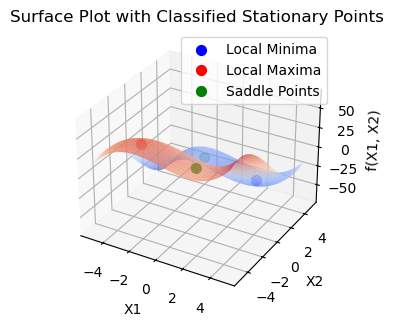

In [93]:
# Plot

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(131, projection='3d')

ax.plot_surface(X1, X2, OBJ, cmap='coolwarm', alpha=0.7)

# Plot stationary points
if minima.size:
    ax.scatter(minima[:, 0], minima[:, 1], minima[:, 2], color='blue', s=50, label='Local Minima')
if maxima.size:
    ax.scatter(maxima[:, 0], maxima[:, 1], maxima[:, 2], color='red', s=50, label='Local Maxima')
if saddle.size:
    ax.scatter(saddle[:, 0], saddle[:, 1], saddle[:, 2], color='green', s=50, label='Saddle Points')

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.set_title('Surface Plot with Classified Stationary Points')

# Show legend and plot
ax.legend()
plt.show()

<span style="color:red">
    1.c. NO global solution, only a local solution @ (2, 4). From the plot, it is clear that the function is NOT convex, and as such, the local solution is NOT a global solution
</span>